# Evaluation Metrics

# 1. Question-1

### Confusion Matrix

A typical confusion matrix looks like the figure shown.

<img src="confusionMatrix.png" width="300">


Where the terms have the meaning:

- True Positive(TP): A result that was predicted as positive by the classification model and also is positive

- True Negative(TN): A result that was predicted as negative by the classification model and also is negative

- False Positive(FP): A result that was predicted as positive by the classification model but actually is negative

- False Negative(FN): A result that was predicted as negative by the classification model but actually is positive.


 ### Accuracy
 
The mathematical formula is :

Accuracy=  (𝑇𝑃+𝑇𝑁)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁) 

Or, it can be said that it’s defined as the total number of correct classifications divided by the total number of classifications.

### Recall or Sensitivity

The mathematical formula is:

Recall= 𝑇𝑃/(𝑇𝑃+𝐹𝑁)

Or, as the name suggests, it is a measure of: from the total number of positive results how many positives were correctly predicted by the model.

It shows how relevant the model is, in terms of positive results only.


### Precision

Precision is a measure of amongst all the positive predictions, how many of them were actually positive. Mathematically,

Precision=𝑇𝑃/(𝑇𝑃+𝐹𝑃)

### F1 Score

When we need a metric that considers both Precision and Recall for evaluating a model. One such metric is the F1 score.

F1 score is defined as the harmonic mean of Precision and Recall.

The mathematical formula is: F1 score=  2∗((𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛∗𝑅𝑒𝑐𝑎𝑙𝑙)/(𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛+𝑅𝑒𝑐𝑎𝑙𝑙))

### Specificity

This represents how specific is the model while predicting the True Negatives. Mathematically,

Specificity= 𝑇𝑁/(𝑇𝑁+𝐹𝑃)

### ROC(Receiver Operator Characteristic)

 A threshold is a value that means, any probability value below the threshold is a negative outcome, and anything more than the threshold is a favourable or the positive outcome. For Example, if the threshold is 0.5, any probability value below 0.5 means a negative or an unfavourable outcome and any value above 0.5 indicates a positive or favourable outcome. 

Here, the question is, what should be an ideal threshold value for a problem statement?

Below is the diagram of ROC Curve(Image credit goes to Google Image)

<img src="ROC.PNG" width="300">

* The point encircled in green is the best point as it predicts all the values correctly and keeps the False positive as a minimum.

* The encircled green point of ROC curve answers the question of which threshold to choose.

### AUC(Area Under Curve)

<img src="AUC.PNG" width="300">

It helps us to choose the best model amongst the models for which we have plotted the ROC curves. In my point of view the best model is the one which it holds the maximum area under it.


# Mean Absolute Error

Mean Absolute Error is the sum of absolute differences between our target and predicted variables.


<img src="mean_absolute_error.svg" width="300">

y_i	=prediction

x_i	=true value

n=total number of data points


# 2. Question-2

In [207]:
import numpy as np
import pandas as pd

In [208]:
data = pd.read_csv("dataset.csv") # Reading the Data
data.head()

,Predicted Class,Actual Class
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [209]:
data.describe()

,Predicted Class,Actual Class
count,160.00000,160.000000
mean,1.46250,1.381250
std,1.09824,1.137535
min,0.00000,0.000000
25%,1.00000,0.000000
50%,1.00000,1.000000
75%,2.00000,2.000000
max,3.00000,3.000000


##### a. Calculate overall accuracy and class-wise accuracy.

In [210]:
def accuracy(actual, predicted):
    """accuracy = (tp + tn) / ts

    , where:    

        ts - Total Samples
        tp - True Positives
        tn - True Negatives
    """
    return (actual == predicted).sum() / float(len(actual))

In [211]:
acc=accuracy(data["Actual Class"],data["Predicted Class"])
print('Overall accuracy: {} %'.format(acc*100))

Overall accuracy: 75.625 %


In [212]:
def per_class_accuracy(y_preds,y_true,class_labels):
    return [np.mean([
        (y_true[pred_idx] == np.round(y_pred)) for pred_idx, y_pred in enumerate(y_preds) 
      if y_true[pred_idx] == int(class_label)
                    ]) for class_label in class_labels]


In [213]:
class_labels = [0,1]
per_class_accuracy(data["Predicted Class"],data["Actual Class"],class_labels)

[0.673469387755102, 0.8888888888888888]

##### b. Calculate confusion metrics.

In [214]:
def compute_confusion_matrix(actual, pred):

  K = len(np.unique(actual)) # Number of classes 
  result = np.zeros((K, K))

  for i in range(len(actual)):
    result[actual[i]][pred[i]] += 1

  return result

In [215]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()  


In [216]:
conf_mat=compute_confusion_matrix(data["Actual Class"], data["Predicted Class"])
conf_mat

array([[33.,  8.,  4.,  4.],
       [ 1., 32.,  3.,  0.],
       [ 3.,  2., 29.,  6.],
       [ 2.,  3.,  3., 27.]])

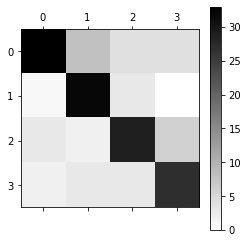

In [217]:
plot_confusion_matrix(conf_mat)

##### c. Calculate precision and recall for all classes and report macro average and weighted average values.

In [218]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [219]:
#  Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8783783783783784

In [220]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8048780487804879

In [221]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9705882352941176

In [222]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8800000000000001

-Micro-average precision scores for all the classes.

-precisionScore_micro_avg = TP / (TP + FP)


In [223]:
precisionScore_micro_avg = true_positive/(true_positive + false_positive)
print('Macro Average: {} '.format(precisionScore_micro_avg))

Macro Average: 0.8048780487804879 


weighted_average = sum(weight * value for weight, value in zip(weights, values)) / sum(weights)

##### d. Calculate F1 score for all classes.


In [224]:

# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score


0.8800000000000001

In [225]:
print('F1 score: {} '.format(F1_Score))



F1 score: 0.8800000000000001 


##### e. Report Type-1 and Type-II error for given data.


In [226]:
TP1_error=false_positive / (true_negative + false_positive)
TP11_error=false_negative / ( true_positive + false_negative)
print('Type 1 error: {}'.format(TP1_error))
print('Type 11 error: {}'.format(TP11_error))

Type 1 error: 0.2
Type 11 error: 0.029411764705882353


##### f. Draw a comparison table between above determined values and values observed from sklearn library (predefined library for performance evaluation).

In [227]:
from sklearn.metrics import accuracy_score
acc_sklearn=accuracy_score(data["Actual Class"], data["Predicted Class"])
print('Overall accuracy using sklearn is: {} %'.format(acc_sklearn*100))

Overall accuracy using sklearn is: 75.625 %


In [228]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(data["Actual Class"], data["Predicted Class"])
matrix.diagonal()/matrix.sum(axis=1)

array([0.67346939, 0.88888889, 0.725     , 0.77142857])

In [229]:
print(matrix)

[[33  8  4  4]
 [ 1 32  3  0]
 [ 3  2 29  6]
 [ 2  3  3 27]]


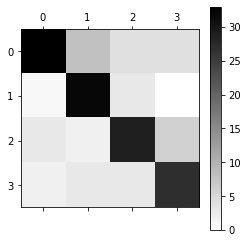

In [230]:
plot_confusion_matrix(matrix)

In [231]:
true_positive = matrix[0][0]
false_positive = matrix[0][1]
false_negative = matrix[1][0]
true_negative = matrix[1][1]


In [232]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score,accuracy_score, f1_score,roc_auc_score,roc_curve,mean_absolute_error 
                            
accuracy_score=accuracy_score(data["Actual Class"], data["Predicted Class"])   
accuracy_score





0.75625

In [233]:
f1_score=f1_score(data["Actual Class"], data["Predicted Class"], average=None) 
f1_score

array([0.75      , 0.79012346, 0.73417722, 0.75      ])

#### g. Use any 2 metrics from Question 1 for implementation and report your results for this dataset.

###### MAE

In [234]:
# MAE
mean_absolute_error = mean_absolute_error(data["Actual Class"], data["Predicted Class"])
mean_absolute_error

0.38125